In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model

In [ ]:
# Wczytaj dane wejściowe z pierwszego pliku Excel
input_data = pd.read_excel("C:/Users/mbkil/excele/Avalon_fingerprints.xlsx")
input_data = input_data.iloc[:, :512] # wybierz pierwsze 512 kolumn jako dane wejściowe

# Wczytaj dane wyjściowe z drugiego pliku Excel
output_data = pd.read_excel("C:/Users/mbkil/excele/TC.XLSX")



In [ ]:
input_data

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_503,Col_A_504,Col_A_505,Col_A_506,Col_A_507,Col_A_508,Col_A_509,Col_A_510,Col_A_511,Col_A_512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
output_data

,Critical_Temperature
0,173.70
1,304.26
2,364.59
3,423.90
4,469.70
...,...
495,549.00
496,577.20
497,570.76
498,504.03


In [ ]:
# Podzielenie danych wejściowych i wyjściowych na zbiory treningowe, walidacyjne i testowe
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.4, random_state=42)

In [89]:

# Zdefiniowanie modelu sieci neuronowej
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(512,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Skompilowanie modelu
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Trenowanie modelu na zbiorze treningowym
history = model.fit(X_train, y_train, epochs=160, batch_size=64, validation_data=(X_val, y_val))

_, mae = model.evaluate(X_test, y_test)
print("MAE:", mae)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)



Epoch 1/160
7/7 [==============================] - 1s 35ms/step - loss: 309268.3125 - mean_absolute_error: 552.9091 - val_loss: 310346.6562 - val_mean_absolute_error: 549.5085
Epoch 2/160
7/7 [==============================] - 0s 14ms/step - loss: 299649.4375 - mean_absolute_error: 544.2033 - val_loss: 291585.2188 - val_mean_absolute_error: 532.5312
Epoch 3/160
7/7 [==============================] - 0s 14ms/step - loss: 268675.2500 - mean_absolute_error: 514.8524 - val_loss: 238375.4062 - val_mean_absolute_error: 480.6313
Epoch 4/160
7/7 [==============================] - 0s 14ms/step - loss: 193733.2188 - mean_absolute_error: 433.6855 - val_loss: 132448.3438 - val_mean_absolute_error: 349.2429
Epoch 5/160
7/7 [==============================] - 0s 13ms/step - loss: 81331.7969 - mean_absolute_error: 252.7851 - val_loss: 43955.5078 - val_mean_absolute_error: 163.7458
Epoch 6/160
7/7 [==============================] - 0s 13ms/step - loss: 52798.1406 - mean_absolute_error: 171.9039 - val_l

In [90]:
# Wyniki R2:

print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.8737814673758333
Validation R2: 0.6327344447498958
Test R2: 0.5511139534583587


In [93]:
model.save("trained_modelv1.h5")

2/2 [==============================] - 0s 4ms/step


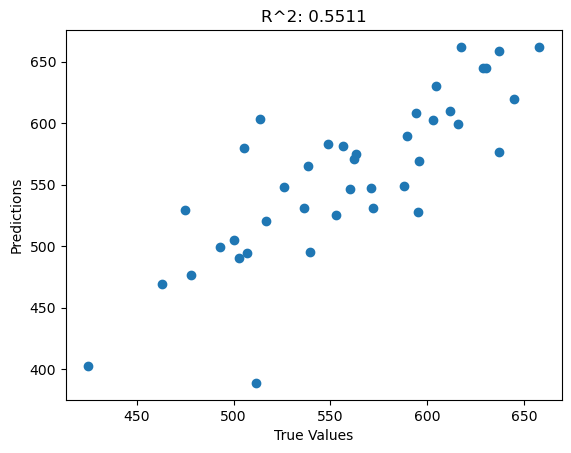

In [91]:
#W Wykres R2:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("R^2: {:.4f}".format(r2))

plt.show()

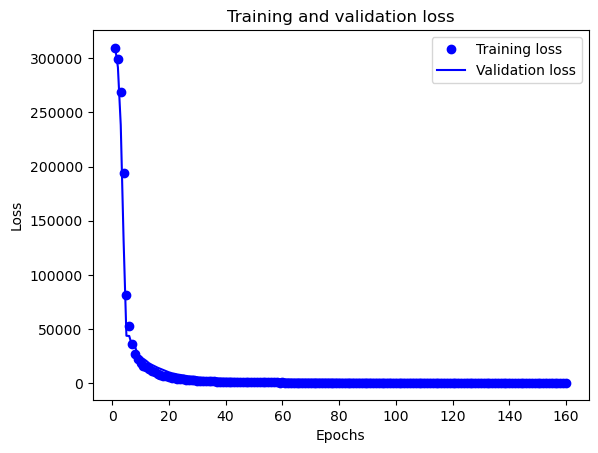

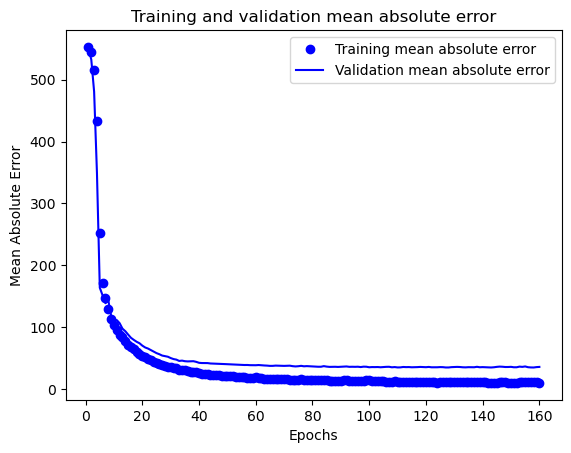

In [92]:

history_dict = history.history

# Wykres dla błędu średniokwadratowego (loss)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Wykres dla błędu średniej wartości bezwzględnej (mean absolute error)
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_mean_absolute_error']

plt.plot(epochs, mae_values, 'bo', label='Training mean absolute error')
plt.plot(epochs, val_mae_values, 'b', label='Validation mean absolute error')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()